## В различных районах города были проведены исследования загрязнения воздуха вредными примесями. Таблица содержит усредненные значения показателей уровня СО (Х1) и пыли (Х2) в процентах от ПДК (V - номер варианта) в разных районах города. Построить дерево иерархической группировки, используя при этом агломеративный алгоритм; евклидову метрику. Расстояние между группами определять

 1. по «дальнему» соседу
 2. «ближайшему» соседу.

In [34]:

import matplotlib.pyplot as plt
import pandas as pd

In [38]:
v = 39
data = pd.DataFrame([[40 + v, 100 - v, 30 + v, 25 + v, v, 100 + v, 230 - v, 110 + v, 120 + v, 180 - v],
                     [10 + v, 110 - v, 20 + v, 15 + v, 105 - v, 120 + v, 220 - v, 90 + v, 200 - v, 160 - v]])
data

,0,1,2,3,4,5,6,7,8,9
0,79,61,69,64,39,139,191,149,159,141
1,49,71,59,54,66,159,181,129,161,121


## Data visualization


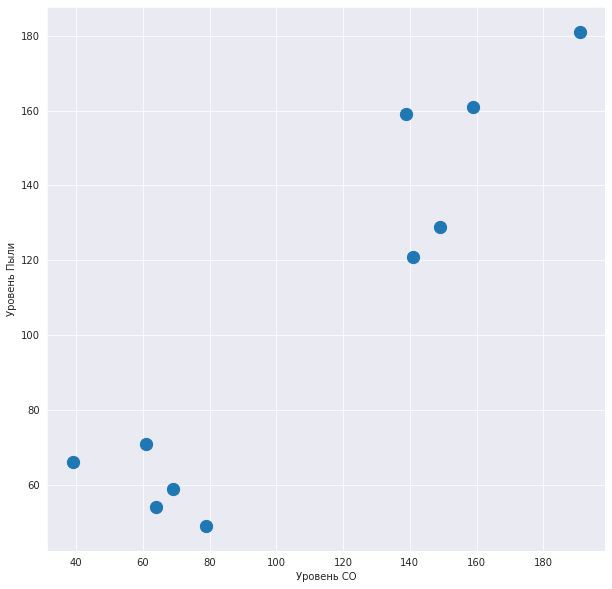

In [39]:
plt.figure(figsize=(10, 10))
plt.scatter(data.values[0], data.values[1], s=150)
plt.xlabel('Уровень CO')
plt.ylabel("Уровень Пыли")
plt.show()

# Рисуем дерево иерархической группировки и воводим матрицу соединений


## Сначала выведем дерево где расстояние |между группами ищется по ближнему соседу
$$d(u,v) = min(dist[u[i],v[j])$$

linkage_matrix
: [[ 2.          3.          7.07106781  2.        ]
 [ 7.          9.         11.3137085   2.        ]
 [ 0.         10.         14.14213562  3.        ]
 [ 1.         12.         14.4222051   4.        ]
 [ 5.          8.         20.09975124  2.        ]
 [ 4.         13.         22.56102835  5.        ]
 [11.         14.         31.6227766   4.        ]
 [ 6.         16.         37.73592453  5.        ]
 [15.         17.         94.33981132 10.        ]]


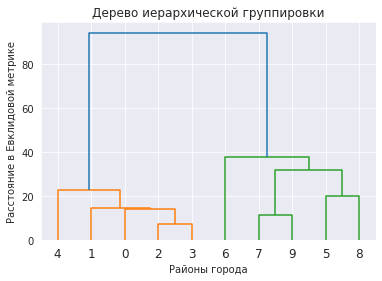

In [41]:
# Рисуем дерево иерархической группировки
from scipy.cluster.hierarchy import dendrogram
import scipy


def plot_dendrogram(data, linkage_method, **kwargs):
    # print(f"data:\n {data.shape}")
    linkage_matrix = scipy.cluster.hierarchy.linkage(data, method=linkage_method)
    print(f"linkage_matrix\n: {linkage_matrix}")
    dendrogram(linkage_matrix, **kwargs)


X = data.values.transpose()

plt.title("Дерево иерархической группировки")
plot_dendrogram(X, linkage_method='single')
plt.xlabel("Районы города")
plt.ylabel("Расстояние в Евклидовой метрике")
plt.show()

## Теперь выведем дерево где расстояние между группами ищется по ближнему соседу
$$d(u,v) = max(dist[u[i],v[j])$$

linkage_matrix
: [[  2.           3.           7.07106781   2.        ]
 [  7.           9.          11.3137085    2.        ]
 [  0.          10.          15.8113883    3.        ]
 [  5.           8.          20.09975124   2.        ]
 [  1.           4.          22.56102835   2.        ]
 [ 12.          14.          43.46262762   5.        ]
 [ 11.          13.          43.8634244    4.        ]
 [  6.          16.          78.10249676   5.        ]
 [ 15.          17.         190.6016789   10.        ]]


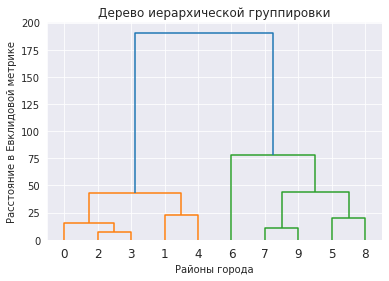

In [42]:
plt.title("Дерево иерархической группировки")
# plot the top three levels of the dendrogram
plot_dendrogram(X, linkage_method='complete')

plt.xlabel("Районы города")
plt.ylabel("Расстояние в Евклидовой метрике")
plt.show()

## 2. Визуализировать объекты набора данных из лабораторной работы 3 или 4 в двумерном пространстве, используя только числовые переменные с помощью

а) PCA (метод главных компонент).
б) tSNE
в) UMAP
В качестве набора данных взят *titanic.csv*

In [43]:
titanic_data = pd.read_csv("train.csv").set_index("PassengerId")
data = titanic_data.copy()
data = data.select_dtypes(exclude=['object'])  # убираем все нечисловые признаки
data.dropna(inplace=True)  # избавляемся от пропущенных значений
X = data.drop("Survived", axis=1)
y = data["Survived"]
data = pd.get_dummies(data, columns=["Pclass", "SibSp", "Parch"])
data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,38.0,71.2833,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,26.0,7.9250,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,35.0,53.1000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,0,35.0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,39.0,29.1250,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
887,0,27.0,13.0000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
888,1,19.0,30.0000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## PCA (Метод главных компонент)

In [44]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data['Survived'].astype(object), labels={'color': 'Survived'})
fig.update_layout(
    title="Метод главных компонент",
    xaxis_title="1 компонента",
    yaxis_title="2 компонента",
)
fig.show()


# tSNE

In [45]:
from sklearn.manifold import TSNE

In [46]:
tsne = TSNE(n_components=2)
components = tsne.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data['Survived'].astype(object), labels={'color': 'Survived'})
fig.update_layout(
    title="tSNE",
    xaxis_title="1 компонента",
    yaxis_title="2 компонента",
)
fig.show()


/home/limp/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/limp/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## UMAP

In [47]:
from umap import UMAP
import plotly.express as px

umap = UMAP(n_components=2)

components = umap.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data['Survived'].astype(object), labels={'color': 'Survived'})
fig.update_layout(
    title="UMAP",
    xaxis_title="1 компонента",
    yaxis_title="2 компонента",
)
fig.show()
